In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
!ls

 about.md
 Country-Code-Mapping.csv
'Data cleaning and visualization.ipynb'
 HackerRank-Developer-Survey-2018-Numeric.csv
 HackerRank-Developer-Survey-2018-Numeric-Mapping.csv
 HackerRank-Developer-Survey-2018-Values.csv
 HackerRank-Developer-Survey-2018-Values.csv.zip


In [3]:
# Data in Original Form 
df_original=pd.read_csv("./HackerRank-Developer-Survey-2018-Values.csv")

/home/ambika/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,10,19,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Printing first 5 rows of the data
df_original.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,NaN,...,Other (please specify),Blogs/articles by industry leaders,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap


In [5]:
# Data in Numeric Form (converting words into numbers)
df=pd.read_csv("./HackerRank-Developer-Survey-2018-Numeric.csv")

/home/ambika/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,19,137,138,250) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#  Printing first five rows of the numeric data
df.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,148.0,3,3,2,3,NaN,1,...,1,datacamp,1,1,NaN,2,NaN,#NULL!,NaN,2
1,6478031510,10/26/17 6:18,10/26/17 7:49,164.0,3,4,1,7,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
2,6464392829,10/19/17 10:44,10/19/17 10:56,98.0,2,2,2,3,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
3,6481629912,10/27/17 1:51,10/27/17 2:05,43.0,2,2,1,5,NaN,1,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,3
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,3,4,2,5,NaN,0,...,1,Blogs/articles by industry leaders,1,1,NaN,2,NaN,#NULL!,NaN,3


In [7]:
# mapping dict for reverse mapping
# keys- column name 
reverse_mapping = {}
maps = pd.read_csv('HackerRank-Developer-Survey-2018-Numeric-Mapping.csv')

In [8]:
maps

,Data Field,Value,Label
0,q1AgeBeginCoding,1,5 - 10 years old
1,q1AgeBeginCoding,2,11 - 15 years old
2,q1AgeBeginCoding,3,16 - 20 years old
3,q1AgeBeginCoding,4,21 - 25 years old
4,q1AgeBeginCoding,5,26 - 30 years old
5,q1AgeBeginCoding,6,31 - 35 years old
6,q1AgeBeginCoding,7,36 - 40 years old
7,q1AgeBeginCoding,8,41 - 50 years old
8,q1AgeBeginCoding,9,50+ years or older
9,q2Age,0,Undisclosed


In [9]:
# inner dictionary =encoding -> label 
for column, encoding, label in np.array(maps):
    if column in reverse_mapping:
        reverse_mapping[column][encoding] = label
    else:
        reverse_mapping[column] = {
            encoding: label
        }

In [10]:
reverse_mapping

{'q1AgeBeginCoding': {1: '5 - 10 years old',
  2: '11 - 15 years old',
  3: '16 - 20 years old',
  4: '21 - 25 years old',
  5: '26 - 30 years old',
  6: '31 - 35 years old',
  7: '36 - 40 years old',
  8: '41 - 50 years old',
  9: '50+ years or older'},
 'q2Age': {0: 'Undisclosed',
  1: 'Under 12 years old',
  2: '12 - 18 years old',
  3: '18 - 24 years old',
  4: '25 - 34 years old',
  5: '35 - 44 years old',
  6: '45 - 54 years old',
  7: '55 - 64 years old',
  8: '65 - 74 years old',
  9: '75 years or older'},
 'q3Gender': {1: 'Male', 2: 'Female', 3: 'Non-Binary', 4: 'Undisclosed'},
 'q4Education': {0: 'Other (please specify)',
  1: 'Some high school',
  2: 'High school graduate',
  3: 'Some college',
  4: 'Vocational training (like bootcamp)',
  5: 'College graduate',
  6: 'Some post graduate work (Masters, PhD)',
  7: 'Post graduate degree (Masters, PhD)'},
 'q5DegreeFocus': {0: 'Other (please specify)',
  1: 'Computer Science',
  2: 'Other STEM (science, technology, engineering,

In [11]:
country_maps = pd.read_csv('Country-Code-Mapping.csv')


In [12]:
country_maps

,Value,Label
0,0,Not Given
1,4,Afghanistan
2,6,Albania
3,7,Algeria
4,8,American Samoa
5,9,Andorra
6,10,Angola
7,12,Argentina
8,13,Armenia
9,14,Asia/Pacific Region


In [13]:
for encoding, label in np.array(country_maps):
    column = 'CountryNumeric2'
    if column in reverse_mapping:
        reverse_mapping[column][encoding] = label
    else:
        reverse_mapping[column] = {
            encoding: label
        }

In [14]:
reverse_mapping

{'q1AgeBeginCoding': {1: '5 - 10 years old',
  2: '11 - 15 years old',
  3: '16 - 20 years old',
  4: '21 - 25 years old',
  5: '26 - 30 years old',
  6: '31 - 35 years old',
  7: '36 - 40 years old',
  8: '41 - 50 years old',
  9: '50+ years or older'},
 'q2Age': {0: 'Undisclosed',
  1: 'Under 12 years old',
  2: '12 - 18 years old',
  3: '18 - 24 years old',
  4: '25 - 34 years old',
  5: '35 - 44 years old',
  6: '45 - 54 years old',
  7: '55 - 64 years old',
  8: '65 - 74 years old',
  9: '75 years or older'},
 'q3Gender': {1: 'Male', 2: 'Female', 3: 'Non-Binary', 4: 'Undisclosed'},
 'q4Education': {0: 'Other (please specify)',
  1: 'Some high school',
  2: 'High school graduate',
  3: 'Some college',
  4: 'Vocational training (like bootcamp)',
  5: 'College graduate',
  6: 'Some post graduate work (Masters, PhD)',
  7: 'Post graduate degree (Masters, PhD)'},
 'q5DegreeFocus': {0: 'Other (please specify)',
  1: 'Computer Science',
  2: 'Other STEM (science, technology, engineering,

In [15]:
language_columns = [
     'q25LangC',
     'q25LangCPlusPlus',
     'q25LangJava',
     'q25LangPython',
     'q25LangRuby',
     'q25LangJavascript',
     'q25LangCSharp',
     'q25LangGo',
     'q25Scala',
     'q25LangPerl',
     'q25LangSwift',
     'q25LangPascal',
     'q25LangClojure',
     'q25LangPHP',
     'q25LangHaskell',
     'q25LangLua',
     'q25LangR',
     'q25LangRust',
     'q25LangTypescript',
     'q25LangKotlin',
     'q25LangJulia',
     'q25LangErlang',
     'q25LangOcaml',
]

In [16]:
data = df[['CountryNumeric2', 'q2Age', 'q3Gender', 'q10Industry', 'q9CurrentRole' ]]

In [17]:
data

,CountryNumeric2,q2Age,q3Gender,q10Industry,q9CurrentRole
0,148.0,3,2,0,18
1,164.0,4,1,5,10
2,98.0,2,2,4,18
3,43.0,2,1,0,18
4,NaN,4,2,14,2
5,167.0,5,1,14,0
6,167.0,6,1,5,19
7,167.0,3,1,4,0
8,154.0,3,1,14,0
9,78.0,3,1,13,18


In [18]:
data.loc[data.q2Age == '#NULL!', 'q2Age'] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
data.q2Age = pd.to_numeric(data.q2Age)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
data.loc[data.q10Industry == '#NULL!', 'q10Industry'] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
data.q10Industry = pd.to_numeric(data.q10Industry)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
data.loc[data.q9CurrentRole == '#NULL!', 'q9CurrentRole'] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
data.q9CurrentRole = pd.to_numeric(data.q9CurrentRole)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
# Create an array with only the columns of interest
arr = np.array(data)
arr[0][0]

148.0

In [25]:
# example of using reverse mapping
print(reverse_mapping['CountryNumeric2'][arr[0][0]])
print(reverse_mapping['CountryNumeric2'][0])

South Korea
Not Given


In [26]:
reverse_mapping['q3Gender'][3]

'Non-Binary'

In [27]:
data.loc[data.q3Gender == '#NULL!', 'q3Gender'] = 4

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
data[data.q3Gender == '4']


,CountryNumeric2,q2Age,q3Gender,q10Industry,q9CurrentRole


In [29]:
data.q3Gender = pd.to_numeric(data.q3Gender)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
gender_wise = data.groupby('q3Gender').aggregate(sum)

In [31]:
gender_wise

,CountryNumeric2,q2Age,q10Industry,q9CurrentRole
q3Gender,,,,
1,1762603.0,74552,183561,202216
2,367709.0,14007,34344,45778
3,11097.0,450,1030,1310
4,5609.0,196,549,546


[Text(0,0,'Male'),
 Text(0,0,'Female'),
 Text(0,0,'Non-Binary'),
 Text(0,0,'Undisclosed')]

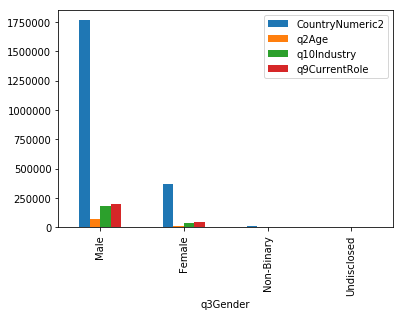

In [32]:
plot = gender_wise.plot.bar()
plot.set_xticklabels(
    list(map(lambda x: reverse_mapping['q3Gender'][x], [1, 2, 3, 4]))
)


[]

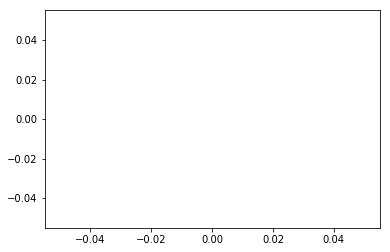

In [33]:
plt.plot(x=gender_wise,y=list(map(lambda x: reverse_mapping['q3Gender'][x], [1, 2, 3, 4])))

In [34]:
data[data.CountryNumeric2.isnull()] = 0

/home/ambika/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
data.head()

,CountryNumeric2,q2Age,q3Gender,q10Industry,q9CurrentRole
0,148.0,3,2,0,18
1,164.0,4,1,5,10
2,98.0,2,2,4,18
3,43.0,2,1,0,18
4,0.0,0,0,0,0


In [36]:
data.CountryNumeric2 = data.CountryNumeric2.astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [37]:
country_wise = data.groupby('CountryNumeric2').aggregate(sum)

In [38]:
country_wise

,q2Age,q3Gender,q10Industry,q9CurrentRole
CountryNumeric2,,,,
0,0,0,0,0
4,10,3,16,30
6,29,9,93,64
7,75,27,140,275
8,3,2,4,18
9,4,1,14,3
10,0,1,0,14
12,416,113,968,762
13,50,18,156,90


In [39]:
data.CountryNumeric2.values

array([148, 164,  98, ...,   0,   0,   0])

AttributeError: 'AxesSubplot' object has no attribute 'show'

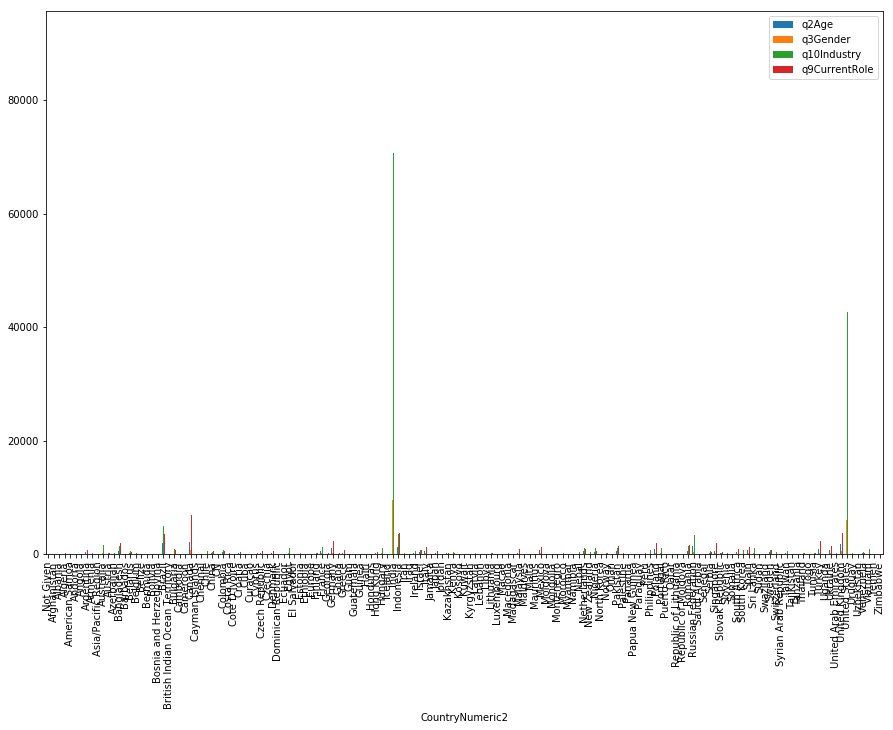

In [43]:
plot = country_wise.plot.bar(figsize=(15, 10))
plot.set_xticklabels(
    list(
        map(
            lambda x: reverse_mapping['CountryNumeric2'][x], 
            sorted(list(set(data.CountryNumeric2.values)))
        )
    )
)
plot.show()

In [41]:
# NaN= not a number
x=float("NaN")
print(type(x))

<class 'float'>


In [42]:
x==x

False